In [1]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [2]:
# Cargar los JSON

# Rutas
path_campaigns = "../data/campaigns.json"
path_inscriptions = "../data/inscriptions.json"
path_leads = "../data/leads.json"

# Cargar en DataFrames
campaigns = pd.read_json(path_campaigns)
inscriptions = pd.read_json(path_inscriptions)
leads = pd.read_json(path_leads)

campaigns.head(), inscriptions.head(), leads.head()


(    campaign_id                    name started_at   ended_at      cost
 0  CAMPAIGN_001     Selectividad_TikTok 2024-06-15 2025-01-08  €1773,41
 1  CAMPAIGN_002       Selectividad_Meta 2024-08-26        NaT  €2029,23
 2  CAMPAIGN_003  Selectividad_googleads 2024-11-03        NaT  €2028,94
 3  CAMPAIGN_004             opos_TikTok 2025-02-03 2025-01-06  €4598,68
 4  CAMPAIGN_005               opos_meta 2025-01-18        NaT  €1007,72,
                          inscription_id                               lead_id  \
 0  6314ea18-828d-4dc3-aaa4-a9011e25a40c  9e5068ff-c01f-4eab-bb38-214fb9d6b83d   
 1  cac5cbc9-1525-4d36-bab4-20caa8fb4c50  6e103a09-c824-45c4-a29a-4be38d7bb2eb   
 2  e052b19b-5fd0-407d-bdc8-9417d7d429f7  95d9f881-6af6-47a3-a656-cba3135f7f2b   
 3  4fd6b73c-ad0b-4fe0-b8be-a75f879434c4  18036b65-9742-4973-9486-4102725bd84e   
 4  c3dafb43-e33b-4fcf-9f7f-0f99afb3de8e  b778e4f5-3ffb-42b4-be7c-79788c7f44a6   
 
                                courseId created_at     amount  
 0

In [5]:
# Chequear la estructura

campaigns.info()
inscriptions.info()
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   campaign_id  8 non-null      object        
 1   name         8 non-null      object        
 2   started_at   8 non-null      datetime64[ns]
 3   ended_at     3 non-null      datetime64[ns]
 4   cost         8 non-null      object        
dtypes: datetime64[ns](2), object(3)
memory usage: 448.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   inscription_id  100 non-null    object        
 1   lead_id         100 non-null    object        
 2   courseId        100 non-null    object        
 3   created_at      100 non-null    datetime64[ns]
 4   amount          100 non-null    object        
dtypes: datetime64[ns](1),

In [6]:
# Limpiar columnas de coste en campaigns
campaigns['cost'] = (
    campaigns['cost']
    .str.replace("€", "")
    .str.replace(",", ".")
    .astype(float)
)

# Limpiar amounts en inscriptions
inscriptions['amount'] = (
    inscriptions['amount']
    .str.replace("€", "")
    .str.replace(",", ".")
    .astype(float)
)

In [11]:
# ¿Cuántas campañas hay?

campaigns['campaign_id'].nunique()


8

In [14]:
# Leads totales y por canal

print(leads['lead_id'].nunique())

leads['input_channel'].value_counts()

1000


input_channel
WEB_ORGANIC     103
CAMPAIGN_007    100
CAMPAIGN_004    100
CAMPAIGN_002     96
CAMPAIGN_003     95
CAMPAIGN_005     90
                 86
CAMPAIGN_001     85
CAMPAIGN_008     83
REF_PARTNER      83
CAMPAIGN_006     79
Name: count, dtype: int64

In [15]:
# ¿Cuántos leads se han convertido? (Aparecen en inscription)

len(inscriptions['lead_id'].unique())

100

Text(0.5, 1.0, 'Leads captados por mes')

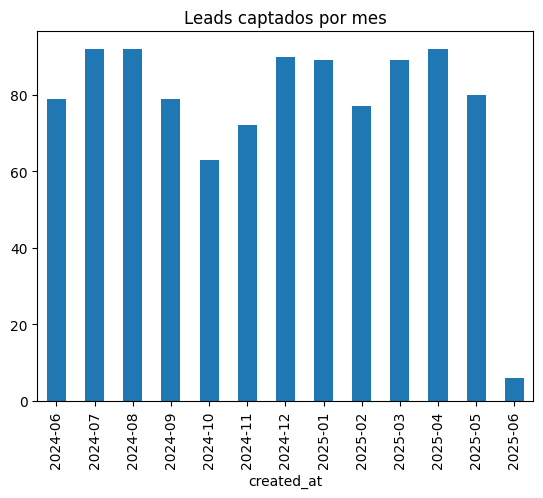

In [16]:
# Evolución de leads en el tiempo

leads.groupby(leads['created_at'].dt.to_period("M")).size().plot(kind="bar")
plt.title("Leads captados por mes")

In [17]:
# Leads enriquecidos con si se inscribieron
leads_with_inscriptions = leads.merge(
    inscriptions[['lead_id', 'inscription_id']],
    on="lead_id",
    how="left",
    indicator=True
)

leads_with_inscriptions['_converted'] = leads_with_inscriptions['_merge'] == 'both'

# Conversion rate por input_channel
conv_rate = leads_with_inscriptions.groupby('input_channel')['_converted'].mean() * 100
conv_rate


input_channel
                 4.651163
CAMPAIGN_001     3.529412
CAMPAIGN_002    15.625000
CAMPAIGN_003    12.631579
CAMPAIGN_004    13.000000
CAMPAIGN_005    12.222222
CAMPAIGN_006    12.658228
CAMPAIGN_007     9.000000
CAMPAIGN_008     9.638554
REF_PARTNER      9.638554
WEB_ORGANIC      6.796117
Name: _converted, dtype: float64

Text(0.5, 0, 'Conversion rate')

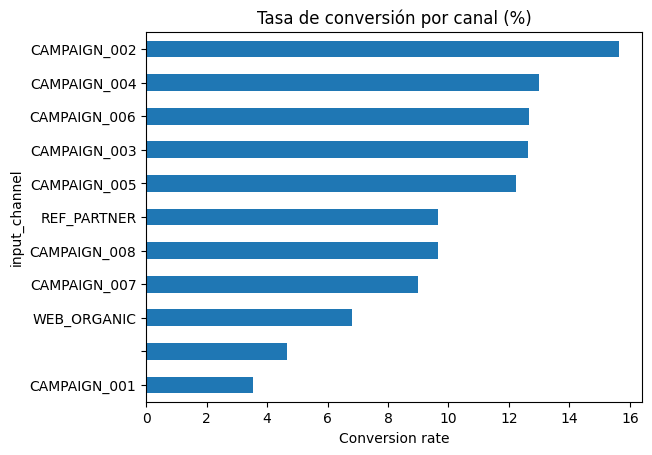

In [18]:
# Visualización rápida

conv_rate.sort_values().plot(kind="barh")
plt.title("Tasa de conversión por canal (%)")
plt.xlabel("Conversion rate")